In [56]:
# import libraries
import sklearn as sk
from sklearn.model_selection import train_test_split

# for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz

# for KNN
from sklearn.neighbors import KNeighborsClassifier

# for random forest
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [53]:
# read dataset and look at general structure
heart = pd.read_csv("heart.csv")

print(heart.info())

# split into data and target
# last column of heart dataset is target variable - 0 for no heart disease, 1 if present
x, y = heart[heart.columns[1:12]], heart[heart.columns[12]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      918 non-null    int64  
 1   Age             918 non-null    int64  
 2   Sex             918 non-null    int64  
 3   ChestPainType   918 non-null    int64  
 4   RestingBP       918 non-null    int64  
 5   Cholesterol     918 non-null    int64  
 6   FastingBS       918 non-null    int64  
 7   RestingECG      918 non-null    int64  
 8   MaxHR           918 non-null    int64  
 9   ExerciseAngina  918 non-null    int64  
 10  Oldpeak         918 non-null    float64
 11  ST_Slope        918 non-null    int64  
 12  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 93.4 KB
None


In [54]:
# create train/test 75/25 split among data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

# save train and test sets to local machine
# x_train.to_csv('data_train.csv')
# x_test.to_csv('data_test.csv')
# y_train.to_csv('target_train.csv')
# y_test.to_csv('target_test.csv')

# files.download('data_train.csv')
# files.download('data_test.csv')
# files.download('target_train.csv')
# files.download('target_test.csv')

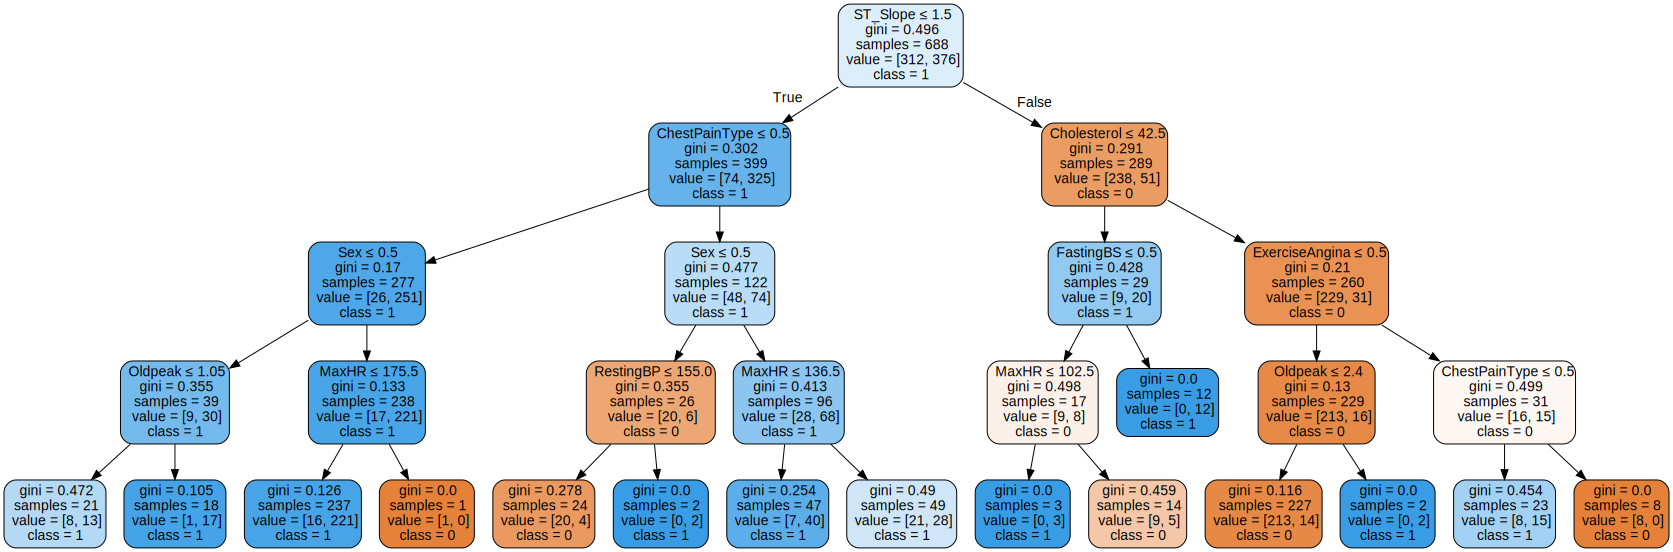

In [110]:
# CREATE THE DECISION TREE
tree = DecisionTreeClassifier(max_depth=4)
#train the classifier
tree.fit(x_train,y_train)

# visualize the tree
# plot_tree(tree, feature_names=heart.columns[0:12])

# visualize tree better using graphviz
dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=heart.columns[1:12],
    class_names=['0', '1'],
    rounded=True,
    filled=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

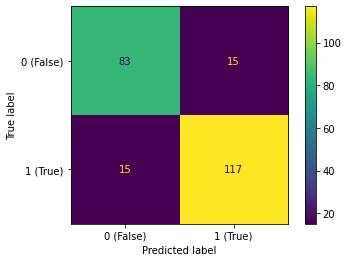

In [111]:
# create confusion matrix for decision tree above using sklearn
# start by making predictions using the x test set
treePredictions = tree.predict(x_test)

# create confusion matrix using test and predicted
treeConfusion = confusion_matrix(y_test, treePredictions)
# print(treeConfusion) -- prints bare confusion matrix

# use metrics.ConfusionMatrixDisplay function to create labeled display
treeConfusion = metrics.ConfusionMatrixDisplay(confusion_matrix = treeConfusion, display_labels = ['0 (False)', '1 (True)'])
treeConfusion.plot()
plt.show()

In [112]:
# calculate metrics
# accuracy using accuracy method in metrics
treeAccuracy = metrics.accuracy_score(y_test, treePredictions)

# precision using method in metrics
treePrecision = metrics.precision_score(y_test, treePredictions)

# recall using method in metrics
treeRecall = metrics.recall_score(y_test, treePredictions)

# f-measure using method in metrics
treeFmeasure = metrics.f1_score(y_test, treePredictions)

# create table of metrics using pandas dataframes and display
treeMetricsTable = pd.DataFrame({
    'Accuracy': [treeAccuracy],
    'Precision': [treePrecision],
    'Recall': [treeRecall],
    'F1 score': [treeFmeasure],
})
print("Metrics for Decision Tree Classifier: \n", treeMetricsTable)

Metrics for Decision Tree Classifier: 
    Accuracy  Precision    Recall  F1 score
0  0.869565   0.886364  0.886364  0.886364


In [78]:
# CREATE K-NEAREST NEIGHBORS
# check accuracies of different k values for knn
for k in range(1,20):
  neighborsTests = KNeighborsClassifier(n_neighbors=k)

  neighborsTests.fit(x_train, y_train)
  knnTestPredictions = neighborsTests.predict(x_test)

  print(f"{k=} :{metrics.accuracy_score(y_test, knnTestPredictions)}")

  # k=13 gives best accuracy so we will use this for our k value
  # create new knn model using same process as above
  neighbors = KNeighborsClassifier(n_neighbors=13)

  neighbors.fit(x_train, y_train)
  knnPredictions = neighbors.predict(x_test)


k=1 :0.6826086956521739
k=2 :0.6304347826086957
k=3 :0.7086956521739131
k=4 :0.7086956521739131
k=5 :0.717391304347826
k=6 :0.691304347826087
k=7 :0.7086956521739131
k=8 :0.6869565217391305
k=9 :0.7
k=10 :0.6869565217391305
k=11 :0.7086956521739131
k=12 :0.6956521739130435
k=13 :0.717391304347826
k=14 :0.6826086956521739
k=15 :0.6782608695652174
k=16 :0.6869565217391305
k=17 :0.691304347826087
k=18 :0.6695652173913044
k=19 :0.6869565217391305


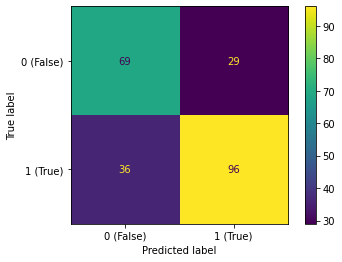

In [65]:
# create confusion matrix for KNN using test and predicted
knnConfusion = confusion_matrix(y_test, knnPredictions)

# use metrics.ConfusionMatrixDisplay function to create labeled display
knnConfusion = metrics.ConfusionMatrixDisplay(confusion_matrix = knnConfusion, display_labels = ['0 (False)', '1 (True)'])
knnConfusion.plot()
plt.show()

In [66]:
# calculate metrics
# accuracy using accuracy method in metrics
knnAccuracy = metrics.accuracy_score(y_test, knnPredictions)

# precision using method in metrics
knnPrecision = metrics.precision_score(y_test, knnPredictions)

# recall using method in metrics
knnRecall = metrics.recall_score(y_test, knnPredictions)

# f-measure using method in metrics
knnFmeasure = metrics.f1_score(y_test, knnPredictions)

# create table of metrics using pandas dataframes and display
knnMetricsTable = pd.DataFrame({
    'Accuracy': [knnAccuracy],
    'Precision': [knnPrecision],
    'Recall': [knnRecall],
    'F1 score': [knnFmeasure],
})
print("Metrics for KNN Classifier: \n", knnMetricsTable)

Metrics for KNN Classifier: 
    Accuracy  Precision    Recall  F1 score
0  0.717391      0.768  0.727273  0.747082


In [113]:
# CREATE RANDOM FOREST 
# check accuracies of different numbers of trees
# for k in range(1,100):
#   forestTests = RandomForestClassifier(n_estimators=k)

#   forestTests.fit(x_train, y_train)
#   forestTestPredictions = forestTests.predict(x_test)

#   print(f"{k=} :{metrics.accuracy_score(y_test, forestTestPredictions)}")

# around 50 trees normally gives best accuracy - ~90%
forest = RandomForestClassifier(n_estimators=50)
# fit the model with training data
forest.fit(x_train, y_train)
# predict 
forestPredictions = forest.predict(x_test)

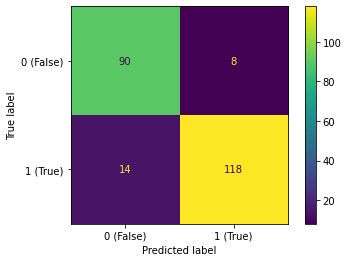

In [28]:
# create confusion matrix for random forest using test and predicted
forestConfusion = confusion_matrix(y_test, forestPredictions)

# use metrics.ConfusionMatrixDisplay function to create labeled display
forestConfusion = metrics.ConfusionMatrixDisplay(confusion_matrix = forestConfusion, display_labels = ['0 (False)', '1 (True)'])
forestConfusion.plot()
plt.show()

In [68]:
# calculate metrics
# accuracy using accuracy method in metrics
forestAccuracy = metrics.accuracy_score(y_test, forestPredictions)

# precision using method in metrics
forestPrecision = metrics.precision_score(y_test, forestPredictions)

# recall using method in metrics
forestRecall = metrics.recall_score(y_test, forestPredictions)

# f-measure using method in metrics
forestFmeasure = metrics.f1_score(y_test, forestPredictions)

# create table of metrics using pandas dataframes and display
forestMetricsTable = pd.DataFrame({
    'Accuracy': [forestAccuracy],
    'Precision': [forestPrecision],
    'Recall': [forestRecall],
    'F1 score': [forestFmeasure],
})
print("Metrics for Random Forest Classifier: \n", forestMetricsTable)

Metrics for Random Forest Classifier: 
    Accuracy  Precision    Recall  F1 score
0  0.882609   0.913386  0.878788  0.895753


In [69]:
# create metrics table for all classifiers
metricsTable = pd.DataFrame({
    'Accuracy': [knnAccuracy, treeAccuracy, forestAccuracy],
    'Precision': [knnPrecision, treePrecision, forestPrecision],
    'Recall': [knnRecall, treeRecall, forestRecall],
    'F1 score': [knnFmeasure, treeFmeasure, forestFmeasure],
}, index=['k-Nearest Neighbors', 'Decision Tree', 'Random Forest'])
print("Metrics for all classifiers: \n", metricsTable)

Metrics for all classifiers: 
                      Accuracy  Precision    Recall  F1 score
k-Nearest Neighbors  0.717391   0.768000  0.727273  0.747082
Decision Tree        0.869565   0.886364  0.886364  0.886364
Random Forest        0.882609   0.913386  0.878788  0.895753


In [80]:
# create table of parameters and print it
parameterTable = pd.DataFrame({
    'Dataset size': ['(918,13)'],
    'Features': [11],
    'Train/test split': ['75%/25%'],
    'x_train size': ['(688,11)'],
    'x_test size': ['(230,11)'],
    'y_train size': ['(688,)'],
    'y_test size': ['(230,)'],
    'k for KNN': [13],
    'Tree depth': [4],
    'Trees in forest': [50]
})
print("Parameters used across models:\n", parameterTable)

Parameters used across models:
   Dataset size  Features Train/test split x_train size x_test size  \
0     (918,13)        11          75%/25%     (688,11)    (230,11)   

  y_train size y_test size  k for KNN  Tree depth  Trees in forest  
0       (688,)      (230,)         13           4               50  
